In [130]:
import pandas as pd 
import numpy as np 
from matplotlib import pyplot as plt 
%matplotlib inline
import seaborn as sns 

In [131]:
k = 3

In [230]:
# Read the training data

df=pd.read_csv('C:/Users/moury/Documents/titanic/train.csv')

#test data
df_test=pd.read_csv('C:/Users/moury/Documents/titanic/test.csv')


In [231]:
# Map categorical variables to numerical values

df['Sex']=df['Sex'].map({'male':0,'female':1})
df['Embarked']=df['Embarked'].map({'S':1,'C':2,'Q':3})
print(np.sum(df.isna()))

# Drop irrelevant columns

df_test.drop(["Cabin","Name","PassengerId","Ticket","SibSp", "Parch"],axis=1,inplace=True)


# Fill missing values in 'Age' and 'Embarked' columns

df['Age']=df['Age'].fillna(method='backfill')
df['Embarked']=df['Embarked'].fillna(method='ffill')

# the mean of Fare for the Pclass 3
df_Pclass_mean = df[df['Pclass'] == 1]['Fare'].mean()

# fill NaN value in Fare column with mean
df.loc[1043, 'Fare'] = df_Pclass_mean

df.isnull().sum()


df_test['Age']=df['Age'].fillna(method='backfill')
df_test['Embarked']=df['Embarked'].fillna(method='ffill')


print(np.sum(df.isna()))
print(df.columns)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
PassengerId      1
Survived         1
Pclass           1
Name             1
Sex              1
Age              1
SibSp            1
Parch            1
Ticket           1
Fare             0
Cabin          688
Embarked         1
dtype: int64
Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


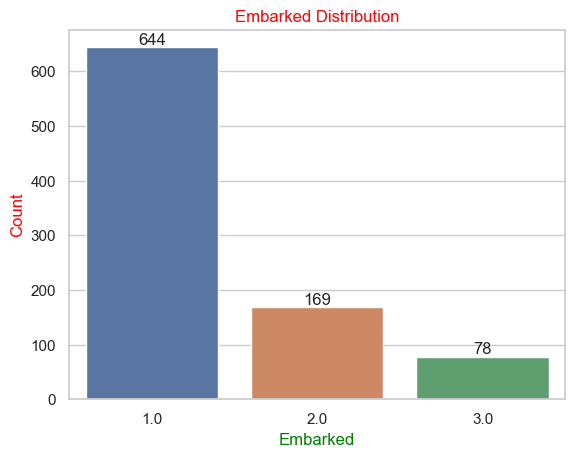

In [232]:
#Embarked distribution visualozation

# Set the style of the plot
ax = sns.set(style="whitegrid")

ax = sns.countplot(data=df,x='Embarked');
ax.bar_label(ax.containers[0])

plt.title('Embarked Distribution',color='Red',loc='center');

# Set the label for the x-axis
plt.xlabel('Embarked',color='Green',loc='center')

# Set the label for the y-axis
plt.ylabel('Count',color='Red',loc='center');

plt.show()


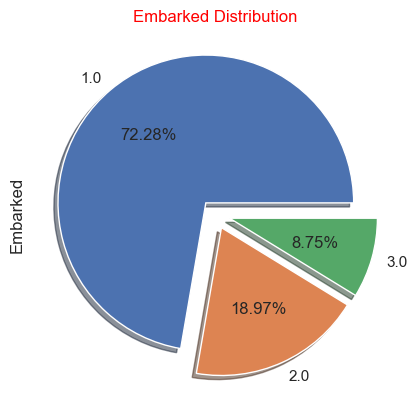

In [233]:
# Create a pie chart of the 'Embarked' column

df['Embarked'].value_counts().plot.pie(explode=[0.1, 0.1, 0.1],
                                     autopct='%1.2f%%',
                                     shadow=True)
plt.title('Embarked Distribution',color='Red',loc='center');



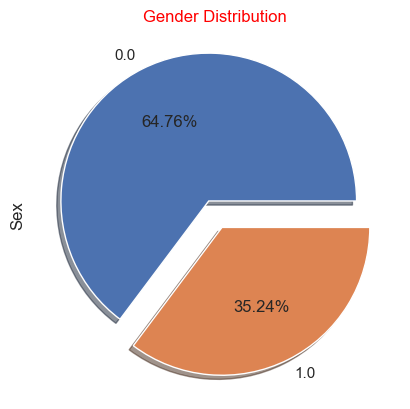

In [234]:
#Gender distribution 
df['Sex'].value_counts().plot.pie(explode=[0.1, 0.1],
                                     autopct='%1.2f%%',
                                     shadow=True)
plt.title('Gender Distribution',color='Red',loc='center');

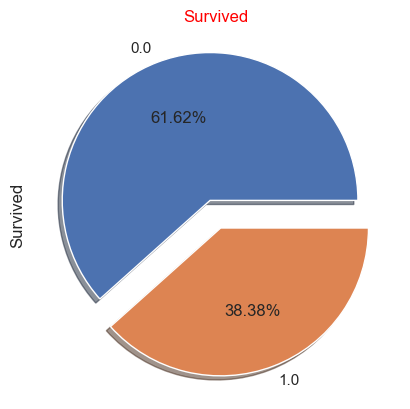

In [235]:
#survival percentage 

df['Survived'].value_counts().plot.pie(explode=[0.1, 0.1],
                                     autopct='%1.2f%%',
                                     shadow=True)
plt.title('Survived',color='Red',loc='center');

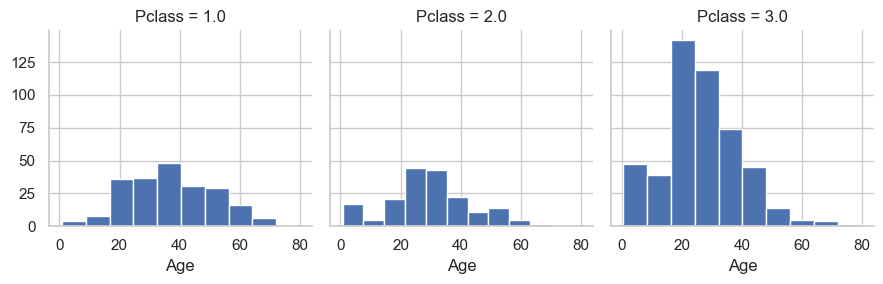

In [236]:
#Age distribution

a = sns.FacetGrid(df, col="Pclass")
a = a.map(plt.hist, "Age")

C:\Users\moury\AppData\Local\Temp\ipykernel_18896\3311685048.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=df.corr()


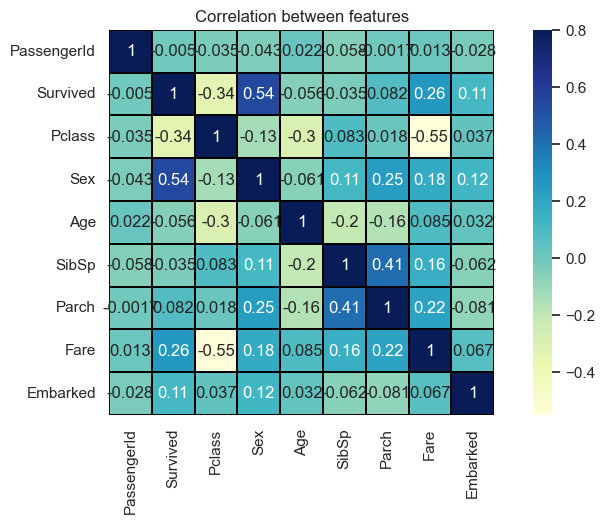

In [237]:
#Survived Heatmap

corr=df.corr()
plt.figure(figsize=(10, 5))
sns.heatmap(corr, vmax=.8, linewidths=0.01, square=True,annot=True,cmap='YlGnBu',linecolor="black")
plt.title('Correlation between features')
plt.show()

In [238]:
# Extract input features and target variable

y=df[['Survived']].values
x=df[['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']].values

#K-Nearest Nneighbors classifier

def dif(x_t,k):
    diff=[]
    
    for i in range(len(x)):
        sum=0
        
        for j in range(7):
            a=((x[i][j]-x_t[j])**2)
            sum+=a
        diff.append(sum**0.5)
        
    di=np.array(diff)
    dif=pd.Series(di)
    
    df1=df.assign(Diff=dif)
    y1=df1[['Survived','Diff']]
    min2=y1.sort_values('Diff')
    #print(y1)   
    select=min2[:k]
    a=list(select['Survived'])
    #print(min2)
    a_0=a.count(0)
    a_1=a.count(1)
    if a_0 > a_1:
        return 0
    else:
        return 1    

In [239]:
# Read the test data

test_df=pd.read_csv(r'C:/Users/moury/Documents/titanic/test.csv')

# Map categorical variables to numerical values

test_df['Sex']=test_df['Sex'].map({'male':0,'female':1})
test_df['Embarked']=test_df['Embarked'].map({'S':1,'C':2,'Q':3})
print(np.sum(df.isna()))

# Drop irrelevant columns

test_df=test_df.drop(['Cabin'],axis=1)

# Fill missing values in 'Age' and 'Embarked' columns

test_df['Age']=test_df['Age'].fillna(method='backfill')
test_df['Embarked']=test_df['Embarked'].fillna(method='ffill')

# Extract test features

test_x=test_df[['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']].values

test_y=[]

print(test_x)

PassengerId      1
Survived         1
Pclass           1
Name             1
Sex              1
Age              1
SibSp            1
Parch            1
Ticket           1
Fare             0
Cabin          688
Embarked         1
dtype: int64
[[ 3.      0.     34.5    ...  0.      7.8292  3.    ]
 [ 3.      1.     47.     ...  0.      7.      1.    ]
 [ 2.      0.     62.     ...  0.      9.6875  3.    ]
 ...
 [ 3.      0.     38.5    ...  0.      7.25    1.    ]
 [ 3.      0.         nan ...  0.      8.05    1.    ]
 [ 3.      0.         nan ...  1.     22.3583  2.    ]]


In [240]:
def test(x_t,k):
    
    for i in range(len(test_x)):
        t_y=dif(x_t[i],k)
        
        test_y.append(t_y)
    print(test_y)


# Perform k-NN classification on the test data

test(test_x,k)

t_1=test_y.count(1)
t_0=test_y.count(0)

y=[]
y.append(t_1)
y.append(t_0)


[0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 

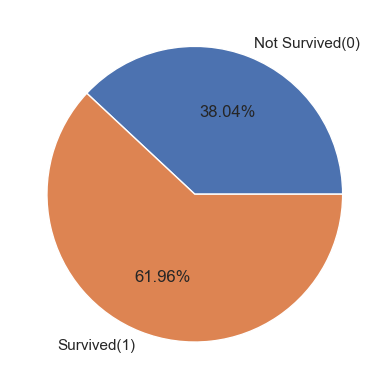

In [241]:
plt.pie(y,labels=['Not Survived(0)','Survived(1)'],autopct='%1.2f%%')
plt.show()
